In [1]:
__depends__=["../results/ebtel_varying_tau_results.pickle",
             "../results/hydrad_varying_tau_results.pickle"]
__dest__=["../results/f1b.eps","../results/f3b.eps","../results/f5b.eps"]

# Plot Emission Measure Distributions
Compute and plot emission measure distributions, $\mathrm{EM}(T)$ for the EBTEL and HYDRAD results for varying pulse duration $\tau$. 

In [4]:
import os
import sys
import pickle

import numpy as np
from scipy.optimize import curve_fit
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

sys.path.append(os.path.join(os.environ['EXP_DIR'],'EBTEL_analysis/src'))
import em_binner as emb

%matplotlib inline

In [5]:
plt.rcParams.update({'figure.figsize' : [8,8]})

First, load the data for the EBTEL and HYDRAD results.

In [6]:
with open(__depends__[0],'rb') as f:
    ebtel_results = pickle.load(f)

In [7]:
with open(__depends__[1],'rb') as f:
    hydrad_results = pickle.load(f)

We'll some very basic curve fitting on a couple of our $\mathrm{EM}$ distributions so set the parameters for that.

In [8]:
Ta = np.log10(6e+6)
Tb = np.log10(10e+6)
def pl_func(x,a,b):
    return a + b*x

Define some parameters for labeling

In [9]:
tau = [20,40,200,500]

## Single-fluid, Figure 1(b)

/home/wtb2/anaconda3/envs/hot_plasma_1_paper/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


Value of the slope for $\tau=20$ $\mathrm{s}$ is b=-4.657544
Value of the slope for $\tau=40$ $\mathrm{s}$ is b=-4.656898
Value of the slope for $\tau=200$ $\mathrm{s}$ is b=-4.067577
Cannot find fit for $\tau=500$ $\mathrm{s}$


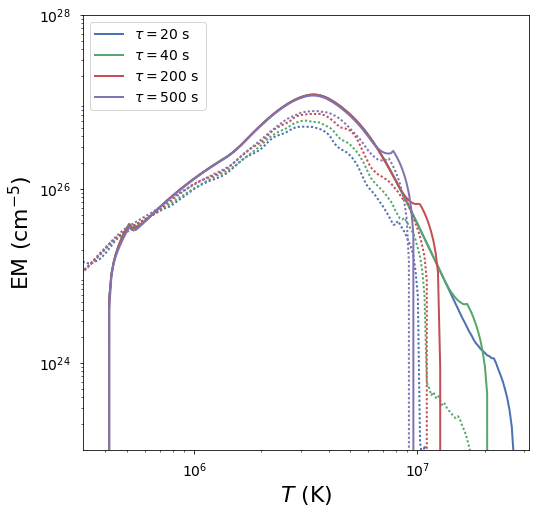

In [10]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(ebtel_results)):
    #EBTEL
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=ebtel_results[i]['t'],temp=ebtel_results[i]['T'],
                           density=ebtel_results[i]['n'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    #Curve Fitting
    logT = np.log10((bin_edges[:-1]+bin_edges[1:])/2)
    logem = np.log10(hist/10)
    T_fit = logT[(logT>=Ta) & (logT<=Tb)]
    em_fit = logem[(logT>=Ta) & (logT<=Tb)]
    try:
        popt,pcov = curve_fit(pl_func,T_fit,em_fit)
        print('Value of the slope for %s is b=%f'%(r'$\tau=%d$ $\mathrm{s}$'%tau[i],popt[1]))
    except ValueError:
        print('Cannot find fit for %s'%(r'$\tau=%d$ $\mathrm{s}$'%tau[i]))
    #HYDRAD
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=hydrad_results['time'],
                           temp=hydrad_results['single']['tau%ds'%tau[i]]['Te'],
                           density=hydrad_results['single']['tau%ds'%tau[i]]['n'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],linestyle='dotted')
    
#aesthetics
#scale
ax.set_yscale('log')
ax.set_xscale('log')
#limits
ax.set_ylim([1e+23,1e+28])
ax.set_xlim([10**5.5,10**7.5])
#ticks
#y
ax.yaxis.set_major_locator(ticker.LogLocator(numticks=5))
#labels
ax.set_xlabel(r'$T\,\,\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
#legend
ax.legend(loc=2)
#save
plt.savefig(__dest__[0])
plt.show()

## Electron Heating, Figure 3(b)

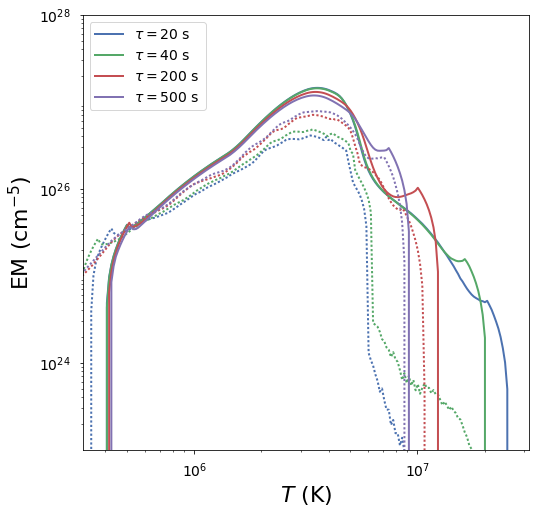

In [11]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(ebtel_results)):
    #EBTEL
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=ebtel_results[i]['te'],temp=ebtel_results[i]['Tee'],
                           density=ebtel_results[i]['ne'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    #HYDRAD
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=hydrad_results['time'],
                           temp=hydrad_results['electron']['tau%ds'%tau[i]]['Te'],
                           density=hydrad_results['electron']['tau%ds'%tau[i]]['n'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],linestyle='dotted')
    
#aesthetics
#scale
ax.set_yscale('log')
ax.set_xscale('log')
#limits
ax.set_ylim([1e+23,1e+28])
ax.set_xlim([10**5.5,10**7.5])
#ticks
#y
ax.yaxis.set_major_locator(ticker.LogLocator(numticks=5))
#labels
ax.set_xlabel(r'$T\,\,\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
#legend
ax.legend(loc=2)
#save
plt.savefig(__dest__[1])
plt.show()

## Ion Heating, Figure 5(b)

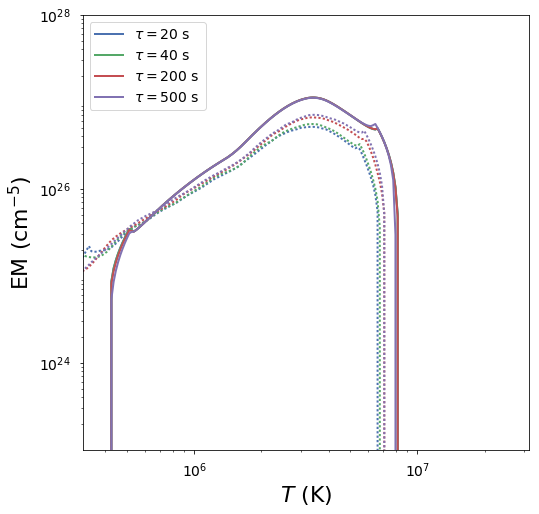

In [12]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(ebtel_results)):
    #EBTEL
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=ebtel_results[i]['ti'],temp=ebtel_results[i]['Tie'],
                           density=ebtel_results[i]['ni'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    #HYDRAD
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=hydrad_results['time'],
                           temp=hydrad_results['ion']['tau%ds'%tau[i]]['Te'],
                           density=hydrad_results['ion']['tau%ds'%tau[i]]['n'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],linestyle='dotted')
    
#aesthetics
#scale
ax.set_yscale('log')
ax.set_xscale('log')
#limits
ax.set_ylim([1e+23,1e+28])
ax.set_xlim([10**5.5,10**7.5])
#ticks
#y
ax.yaxis.set_major_locator(ticker.LogLocator(numticks=5))
#labels
ax.set_xlabel(r'$T\,\,\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
#legend
ax.legend(loc=2)
#save
plt.savefig(__dest__[2])
plt.show()